In [ ]:
import pandas as pd
import seaborn as sns 

Chicago_crimes = pd.read_csv('Chicago Crimes_-_2001_to_Present.csv')
Chicago_crimes

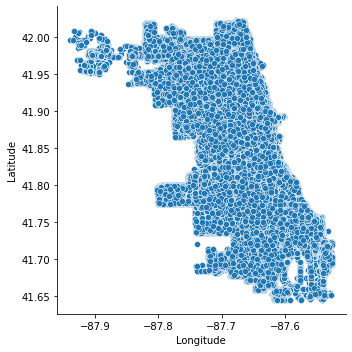

In [2]:
location = Chicago_crimes[['Latitude','Longitude']].copy()
location = location.loc[(location['Latitude'] != None) & (location['Longitude'] != None)]
location = location.loc[(location['Longitude'] > -91 )]
location = location.reset_index(drop=True)
sns.relplot(y='Latitude', x='Longitude', data=location)


In [6]:
import matplotlib.pyplot as plt
import plotly.express as px

fig = px.scatter_mapbox(location.sample(100000), lat="Latitude", lon="Longitude",
                        color_discrete_sequence=["fuchsia"], zoom=8.4, height=350)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(location)
scaled_location = pd.DataFrame(X, index=location.index,columns=location.columns)
scaled_location

Latitude  Longitude
0        1.862028  -3.979227
1        0.477682   0.640578
2       -0.194777   1.100119
3        2.021098  -0.015126
4       -0.195336   1.097059
...           ...        ...
7074537  1.124829  -0.787639
7074538  1.365151  -1.622630
7074539  0.239643  -0.770981
7074540  0.256422   0.202753
7074541  0.256424   0.202380

[7074542 rows x 2 columns]

In [8]:
pip install -U yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,8))

visualizer.fit(scaled_location)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(scaled_location)
plt.figure()
sns.relplot(x='Longitude', y='Latitude', hue=kmeans.labels_, data=scaled_location)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', edgecolor='black', s=100, alpha=0.5)

In [7]:
location['label'] = pd.DataFrame(kmeans.labels_)
print("kk 1 ",location.Latitude.max())
print("kk 2",location.Latitude.min())
print("kk 3",location.Longitude.max())
print("kk 4",location.Longitude.min())


kk 1  42.022910333
kk 2 41.644585429
kk 3 -87.524529378
kk 4 -87.939732936


In [8]:
kmeans.cluster_centers_ = scaler.inverse_transform(kmeans.cluster_centers_[:, :] )

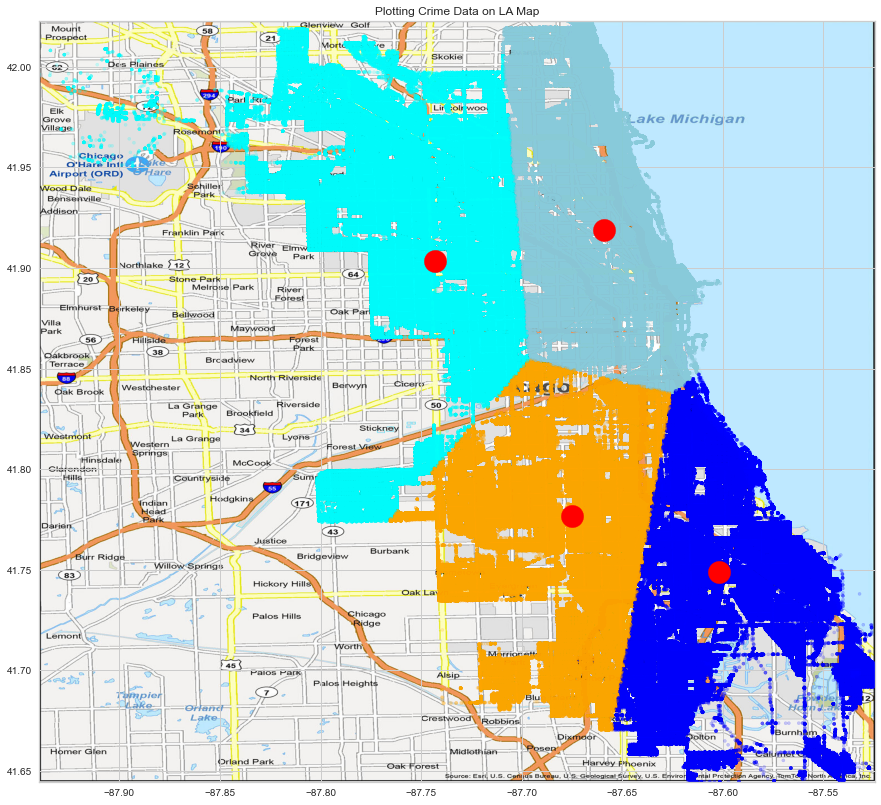

In [9]:
from matplotlib import colors
# 1 42.022910333
# 2 41.644585429
# 3 -87.524529378
# 4 -87.939732936
BBox = ((-87.939732936, -87.524529378, 41.644585429, 42.022910333)) # coordinates of map
ruh_m = plt.imread('Chicago-Map-Illinois.jpg') #importing the map
fig,ax1 = plt.subplots(figsize = (16,14))
colormap = colors.ListedColormap(['blue','aqua' ,'purple','orange','c']) # create new colormap
ax1.scatter(location.Longitude, location.Latitude, zorder=1, alpha= 0.2, cmap=colormap,
           c=location.label, s=10, )
ax1.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], zorder=1, alpha= 1,color='red',s=500, ) #plotting the centroids
ax1.set_title('Plotting Crime Data on LA Map')
ax1.set_xlim(BBox[0],BBox[1])
ax1.set_ylim(BBox[2],BBox[3])
ax1.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [10]:
crime_types = Chicago_crimes['Description'].value_counts()[:20].index
crime_types = pd.DataFrame(crime_types, columns=['Description'])
crime_types

Description
0                          SIMPLE
1                  $500 AND UNDER
2         DOMESTIC BATTERY SIMPLE
3                      TO VEHICLE
4                     TO PROPERTY
5                       OVER $500
6    POSS: CANNABIS 30GMS OR LESS
7                  FORCIBLE ENTRY
8                      AUTOMOBILE
9                   FROM BUILDING
10                   RETAIL THEFT
11               TELEPHONE THREAT
12                        TO LAND
13                    POSS: CRACK
14                 UNLAWFUL ENTRY
15        HARASSMENT BY TELEPHONE
16  AGGRAVATED: OTHER DANG WEAPON
17            POSS: HEROIN(WHITE)
18                 ARMED: HANDGUN
19          STRONGARM - NO WEAPON

In [11]:
Location_decs = Chicago_crimes['Location Description'].value_counts()[:50].index
Location_decs = pd.DataFrame(Location_decs, columns=['Location Description'])
Location_decs

Location Description
0                              STREET
1                           RESIDENCE
2                           APARTMENT
3                            SIDEWALK
4                               OTHER
5      PARKING LOT/GARAGE(NON.RESID.)
6                               ALLEY
7            SCHOOL, PUBLIC, BUILDING
8                    RESIDENCE-GARAGE
9                  SMALL RETAIL STORE
10            RESIDENCE PORCH/HALLWAY
11                         RESTAURANT
12             VEHICLE NON-COMMERCIAL
13                 GROCERY FOOD STORE
14                   DEPARTMENT STORE
15                        GAS STATION
16      RESIDENTIAL YARD (FRONT/BACK)
17            CHA PARKING LOT/GROUNDS
18                      PARK PROPERTY
19       COMMERCIAL / BUSINESS OFFICE
20                      BAR OR TAVERN
21                       CTA PLATFORM
22                      CHA APARTMENT
23                         DRUG STORE
24            SCHOOL, PUBLIC, GROUNDS
25                        HOTEL/MOTEL
26                               BANK
27                          CTA TRAIN
28     CHA HALLWAY/STAIRWELL/ELEVATOR
29                    VACANT LOT/LAND
30                            CTA BUS
31                TAVERN/LIQUOR STORE
32          HOSPITAL BUILDING/GROUNDS
33             DRIVEWAY - RESIDENTIAL
34                  CONVENIENCE STORE
35    POLICE FACILITY/VEH PARKING LOT
36                   AIRPORT/AIRCRAFT
37  CHURCH/SYNAGOGUE/PLACE OF WORSHIP
38       GOVERNMENT BUILDING/PROPERTY
39       NURSING HOME/RETIREMENT HOME
40          SCHOOL, PRIVATE, BUILDING
41                  CONSTRUCTION SITE
42                 ABANDONED BUILDING
43                  CURRENCY EXCHANGE
44        CTA GARAGE / OTHER PROPERTY
45                          WAREHOUSE
46                      ATHLETIC CLUB
47     ATM (AUTOMATIC TELLER MACHINE)
48                         BARBERSHOP
49                            TAXICAB

In [12]:
Primary_Type = Chicago_crimes['Primary Type'].value_counts()[:50].index
Primary_Type = pd.DataFrame(Primary_Type, columns=['Primary Type'])
Primary_Type

Primary Type
0                               THEFT
1                             BATTERY
2                     CRIMINAL DAMAGE
3                           NARCOTICS
4                             ASSAULT
5                       OTHER OFFENSE
6                            BURGLARY
7                 MOTOR VEHICLE THEFT
8                  DECEPTIVE PRACTICE
9                             ROBBERY
10                  CRIMINAL TRESPASS
11                  WEAPONS VIOLATION
12                       PROSTITUTION
13             PUBLIC PEACE VIOLATION
14         OFFENSE INVOLVING CHILDREN
15                CRIM SEXUAL ASSAULT
16                        SEX OFFENSE
17   INTERFERENCE WITH PUBLIC OFFICER
18                           GAMBLING
19               LIQUOR LAW VIOLATION
20                              ARSON
21                           HOMICIDE
22                         KIDNAPPING
23                       INTIMIDATION
24                           STALKING
25            CRIMINAL SEXUAL ASSAULT
26                          OBSCENITY
27  CONCEALED CARRY LICENSE VIOLATION
28                   PUBLIC INDECENCY
29                       NON-CRIMINAL
30           OTHER NARCOTIC VIOLATION
31                  HUMAN TRAFFICKING
32                     NON - CRIMINAL
33                          RITUALISM
34   NON-CRIMINAL (SUBJECT SPECIFIED)
35                  DOMESTIC VIOLENCE

In [27]:
crimes_kmode = pd.merge (Chicago_crimes, crime_types, on='Description' )
crimes_kmode = pd.merge (crimes_kmode, Location_decs, on='Location Description' )
crimes_kmode = pd.merge (crimes_kmode, Primary_Type, on='Primary Type' )
crimes_kmode

ID Case Number                    Date  \
0        11227583    JB147595  03/28/2017 02:00:00 PM   
1        11236891    JB160512  03/10/2017 10:00:00 AM   
2         4848375    HL487626  07/15/2005 03:45:00 PM   
3         8193540    HN703097  11/12/2007 01:56:00 PM   
4         2120243    HH358250  05/08/2002 11:00:00 AM   
...           ...         ...                     ...   
5244337   9247614    HW393626  08/04/2013 02:00:00 AM   
5244338   9852325    HX501449  11/07/2014 07:00:00 PM   
5244339   3236774    HK253950  03/21/2004 06:46:50 PM   
5244340   6748927    HR159708  02/07/2009 07:30:00 PM   
5244341   9788326    HX437962  09/20/2014 07:00:00 PM   

                                       Block  IUCR         Primary Type  \
0                            026XX W 79TH ST  0620             BURGLARY   
1                         074XX S PULASKI RD  0620             BURGLARY   
2                        050XX W CHICAGO AVE  0620             BURGLARY   
3                        016XX S INDIANA AVE  0620             BURGLARY   
4                        046XX N CLIFTON AVE  0620             BURGLARY   
...                                      ...   ...                  ...   
5244337                     024XX N CLARK ST  0264  CRIM SEXUAL ASSAULT   
5244338                    006XX S HOMAN AVE  0264  CRIM SEXUAL ASSAULT   
5244339  037XX S DR MARTIN LUTHER KING JR DR  0264  CRIM SEXUAL ASSAULT   
5244340                      0000X W 69TH ST  0264  CRIM SEXUAL ASSAULT   
5244341                 011XX W LAWRENCE AVE  0264  CRIM SEXUAL ASSAULT   

                           Description            Location Description  \
0                       UNLAWFUL ENTRY                           OTHER   
1                       UNLAWFUL ENTRY                           OTHER   
2                       UNLAWFUL ENTRY                           OTHER   
3                       UNLAWFUL ENTRY                           OTHER   
4                       UNLAWFUL ENTRY                           OTHER   
...                                ...                             ...   
5244337  AGGRAVATED: OTHER DANG WEAPON                           ALLEY   
5244338  AGGRAVATED: OTHER DANG WEAPON                           ALLEY   
5244339  AGGRAVATED: OTHER DANG WEAPON  CHA HALLWAY/STAIRWELL/ELEVATOR   
5244340  AGGRAVATED: OTHER DANG WEAPON                    CTA PLATFORM   
5244341  AGGRAVATED: OTHER DANG WEAPON                       CTA TRAIN   

         Arrest  Domestic  ...  Ward  Community Area  FBI Code  X Coordinate  \
0         False     False  ...  18.0            70.0        05           NaN   
1         False     False  ...  18.0            70.0        05           NaN   
2         False     False  ...  28.0            25.0        05           NaN   
3         False     False  ...   2.0            33.0        05           NaN   
4         False     False  ...  46.0             3.0        05           NaN   
...         ...       ...  ...   ...             ...       ...           ...   
5244337   False     False  ...  43.0             7.0        02     1172687.0   
5244338   False     False  ...  24.0            27.0        02     1153804.0   
5244339   False     False  ...   4.0            35.0        02     1179472.0   
5244340   False     False  ...   6.0            69.0        02     1177279.0   
5244341   False     False  ...  46.0             3.0        02     1167822.0   

        Y Coordinate  Year              Updated On   Latitude  Longitude  \
0                NaN  2017  02/11/2018 03:57:41 PM        NaN        NaN   
1                NaN  2017  02/22/2018 03:58:56 PM        NaN        NaN   
2                NaN  2005  08/17/2015 03:03:40 PM        NaN        NaN   
3                NaN  2007  08/17/2015 03:03:40 PM        NaN        NaN   
4                NaN  2002  08/17/2015 03:03:40 PM        NaN        NaN   
...              ...   ...                     ...        ...        ...   
5244337    1916467.0  2013  02/10/2018 03:50:01

In [15]:
pip install --upgrade kmodes

Note: you may need to restart the kernel to use updated packages.


In [28]:
from kmodes.kmodes import KModes
km = KModes(n_clusters=10, init='Huang', n_init=3, verbose=1)

clusters = km.fit_predict(crimes_kmode[['Description','Location Description','Primary Type']])
# Print the cluster centroids
print(km.cluster_centroids_)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1537731, cost: 6591890.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 752338, cost: 6821946.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1094369, cost: 5663193.0
Run 3, iteration: 2/100, moves: 260233, cost: 5663193.0
Best run was number 3
[['SIMPLE' 'RESIDENCE' 'BATTERY']
 ['AUTOMOBILE' 'OTHER' 'MOTOR VEHICLE THEFT']
 ['TO VEHICLE' 'STREET' 'CRIMINAL DAMAGE']
 ['DOMESTIC BATTERY SIMPLE' 'APARTMENT' 'BATTERY']
 ['$500 AND UNDER' 'STREET' 'THEFT']
 ['POSS: CANNABIS 30GMS OR LESS' 'SIDEWALK' 'NARCOTICS']
 ['SIMPLE' 'STREET' 'ASSAULT']
 ['AUTOMOBILE' 'STREET' 'MOTOR VEHICLE THEFT']
 ['TO PROPERTY' 'RESIDENCE' 'CRIMINAL DAMAGE']
 ['OVER $500' 'STREET' 'THEFT']]


In [31]:
FBI_Code = Chicago_crimes['FBI Code'].value_counts()[:100].index
FBI_Code = pd.DataFrame(FBI_Code, columns=['FBI Code'])
FBI_Code

FBI Code
0        06
1       08B
2        14
3        26
4        18
5        05
6       08A
7        07
8        03
9        11
10      04B
11      04A
12       15
13       16
14       24
15       10
16       02
17       17
18       20
19       19
20       22
21       09
22      01A
23       13
24       12
25      01B

In [32]:
Chicago_crimes_clearedcrimes = pd.merge(Chicago_crimes, FBI_Code, on='FBI Code')
Chicago_crimes_clearedcrimes

ID Case Number                    Date  \
0        11034701    JA366925  01/01/2001 11:00:00 AM   
1        11227633    JB147500  12/28/2017 03:55:00 PM   
2        11227247    JB147078  01/01/2012 09:00:00 AM   
3        11227407    JB147329  10/14/2017 12:01:00 AM   
4        11028056    JA359834  10/15/2014 03:00:00 PM   
...           ...         ...                     ...   
7143694   8412592    HT645596  12/23/2011 10:55:00 PM   
7143695   8439824    HV117252  01/14/2012 03:20:00 AM   
7143696   9410898    HW554421  12/01/2013 02:45:00 PM   
7143697   9665064    HX315198  06/22/2014 08:45:00 AM   
7143698   9899714    HX550144  12/21/2014 03:10:00 AM   

                            Block  IUCR        Primary Type  \
0                 016XX E 86TH PL  1153  DECEPTIVE PRACTICE   
1            011XX S MICHIGAN AVE  1153  DECEPTIVE PRACTICE   
2        105XX S INDIANAPOLIS AVE  1153  DECEPTIVE PRACTICE   
3           037XX N SOUTHPORT AVE  1150  DECEPTIVE PRACTICE   
4              047XX S PULASKI RD  1153  DECEPTIVE PRACTICE   
...                           ...   ...                 ...   
7143694      050XX W ARMITAGE AVE  0142            HOMICIDE   
7143695       037XX S WESTERN AVE  0142            HOMICIDE   
7143696      048XX W AUGUSTA BLVD  0141            HOMICIDE   
7143697     017XX W CONGRESS PKWY  0141            HOMICIDE   
7143698       053XX S WESTERN AVE  0142            HOMICIDE   

                                 Description            Location Description  \
0        FINANCIAL IDENTITY THEFT OVER $ 300                       RESIDENCE   
1        FINANCIAL IDENTITY THEFT OVER $ 300                             NaN   
2        FINANCIAL IDENTITY THEFT OVER $ 300                       RESIDENCE   
3                          CREDIT CARD FRAUD                           OTHER   
4        FINANCIAL IDENTITY THEFT OVER $ 300  PARKING LOT/GARAGE(NON.RESID.)   
...                                      ...                             ...   
7143694                    RECKLESS HOMICIDE                        SIDEWALK   
7143695                    RECKLESS HOMICIDE                          STREET   
7143696             INVOLUNTARY MANSLAUGHTER                       APARTMENT   
7143697             INVOLUNTARY MANSLAUGHTER       HOSPITAL BUILDING/GROUNDS   
7143698                    RECKLESS HOMICIDE                          STREET   

         Arrest  Domestic  ...  Ward  Community Area  FBI Code  X Coordinate  \
0         False     False  ...   8.0            45.0        11           NaN   
1         False     False  ...   2.0            32.0        11           NaN   
2         False     False  ...  10.0            52.0        11           NaN   
3         False     False  ...  44.0             6.0        11           NaN   
4         False     False  ...  14.0            57.0        11           NaN   
...         ...       ...  ...   ...             ...       ...           ...   
7143694    True     False  ...  31.0            19.0       01B     1142325.0   
7143695    True     False  ...  12.0            59.0       01B     1160977.0   
7143696   False     False  ...  37.0            25.0       01B     1143841.0   
7143697    True     False  ...   2.0            28.0       01B     1164740.0   
7143698    True      True  ...  14.0            63.0       01B     1161277.0   

        Y Coordinate  Year              Updated On   Latitude  Longitude  \
0                NaN  2001  08/05/2017 03:50:08 PM        NaN        NaN   
1                NaN  2017  02/11/2018 03:57:41 PM        NaN        NaN   
2                NaN  2012  02/11/2018 03:57:41 PM        NaN        NaN   
3                NaN  2017  02/22/2018 03:56:47 PM        NaN        NaN   
4                NaN  2014  07/24/2017 03:54:23 PM        NaN        NaN   
...              ...   ...                     ...        ...        ...   
7143694    1912825.0  2011  02/10/2018 03:50:01 PM  41.916849 -87.752531   
7143695    1879973.0  2012  02/10/2018 03:5

In [39]:
distr_crimes = Chicago_crimes_clearedcrimes.pivot_table(index="District", columns="Description", values='District',aggfunc='count')
distr_crimes = distr_crimes.reset_index()
distr_crimes = distr_crimes.fillna(0)


ValueError: Grouper for 'District' not 1-dimensional

In [ ]:
# distr_crimes = distr_crimes.drop(['INTIMATE PARTNER - SIMPLE ASSAULT', 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
#     'INTIMATE PARTNER - AGGRAVATED ASSAULT','CHILD NEGLECT (SEE 300 W.I.C.)',
#     'THREATENING PHONE CALLS/LETTERS'],   axis=1)
# distr_crimes

In [38]:
distr_codes= pd.DataFrame()
distr_codes['District'] = distr_crimes['District'].copy()
distr_crimes = distr_crimes.drop(['District'], axis=1)
distr_codes

NameError: name 'distr_crimes' is not defined

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(distr_crimes)
scaled_distr_crimes = pd.DataFrame(X, index=distr_crimes.index, 
                             columns=distr_crimes.columns)
scaled_distr_crimes

In [ ]:
kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,14))

visualizer.fit(scaled_distr_crimes)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=100).fit(scaled_distr_crimes)
print(kmeans.cluster_centers_)

In [ ]:
distr_codes['label'] = pd.DataFrame(kmeans.labels_)
distr_codes

In [ ]:
indexes_2 = distr_codes.loc[distr_codes['label'] == 2].index
indexes_1 = distr_codes.loc[distr_codes['label'] == 1].index
distr_codes.loc[indexes_2,'label'] = 1
distr_codes.loc[indexes_1,'label'] = 2

In [ ]:
crime_data_district = pd.merge(distr_codes, la_crimes[['DISTR_NO','LAT','LON']], on='DISTR_NO')
crime_data_district

In [ ]:
BBox = ((-118.7000, -118, 33.7000, 34.3450)) # coordinates of map
ruh_m = plt.imread('Chicago-Map-Illinois.jpg') #importing the map
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (32,28))
colormap = colors.ListedColormap(['green','orange' ,'red']) # create new colormap
ax1.scatter(crime_data_district.LON, crime_data_district.LAT, zorder=1, alpha= 0.2, cmap=colormap,
           c=crime_data_district.label, s=10, )
ax1.set_title('Plotting Crime Data on LA Map')
ax1.set_xlim(BBox[0],BBox[1])
ax1.set_ylim(BBox[2],BBox[3])
ax1.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
ax2.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')